### Задание

## Цель:

закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.
## Описание задания:

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

## Этапы работы:

1. Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.

2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

9/ Сформулируйте выводы по проделанной работе:

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b. *может ли ROC-кривая проходить ниже диагонали?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


import datetime
from datetime import datetime
from dateutil.parser import parse

In [2]:
# датасет содержит данные спортсменов Олимпиады в Рио в 2016г.
# дата закрытия Олимпиады 21 August 2016
data = pd.read_csv('athletes.csv')
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [3]:
data.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [4]:
data.loc[data['dob'].isna()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


In [5]:
# Павел Валерьевич Созыкин (род. 25 декабря 1987, Челябинск) — российский яхтсмен,
# бронзовый призёр чемпионатов мира и Европы 2015 года в соревнованиях в классе 470,
# чемпион России, Мастер спорта международного класса.

In [6]:
data.loc[8546, 'dob'] = 1987

In [7]:
data['dob'].isna().mean()*100

0.0

In [8]:
data.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [9]:
data['dob'] = pd.to_datetime(data['dob']).dt.strftime('%Y')
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,2069,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,1995,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,1986,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,1991,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,1989,1.60,56.0,weightlifting,0,0,0


In [10]:
data['dob'] = data['dob'].astype(int)

In [11]:
data.dtypes

id               int64
name            object
nationality     object
sex             object
dob              int32
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [12]:
def p_date(date): 
    '''
    получаем возраст спортсмена разницей года проведения Олимпиады
    и года рождения 
    избегаем появления возрастов на сто лет старше реального    
    '''
    date_olymp = 2016
    dt = date
    if dt > 2002:
       dt = dt - 100   
    return date_olymp - dt

In [13]:
data['age'] = data['dob'].apply(p_date) 
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,2069,1.72,64.0,athletics,0,0,0,47
1,532037425,A Lam Shin,KOR,female,1986,1.68,56.0,fencing,0,0,0,30
2,435962603,Aaron Brown,CAN,male,1992,1.98,79.0,athletics,0,0,1,24
3,521041435,Aaron Cook,MDA,male,1991,1.83,80.0,taekwondo,0,0,0,25
4,33922579,Aaron Gate,NZL,male,1990,1.81,71.0,cycling,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,1995,1.64,58.0,athletics,0,0,0,21
11534,214461847,Zuzana Hejnova,CZE,female,1986,1.73,63.0,athletics,0,0,0,30
11535,88361042,di Xiao,CHN,male,1991,1.85,100.0,wrestling,0,0,0,25
11536,900065925,le Quoc Toan Tran,VIE,male,1989,1.60,56.0,weightlifting,0,0,0,27


In [14]:
data['age'].describe()

count    11538.000000
mean        26.698908
std          5.381582
min         14.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         62.000000
Name: age, dtype: float64

In [15]:
del data['dob']
data.head(1)

,id,name,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1.72,64.0,athletics,0,0,0,47


In [16]:
# отфильтрую дубли. Так как возможны полные тёзки, добавлю условиe совпадение очевидные - id
data = data.drop_duplicates(subset=['name', 'id'])
data

,id,name,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1.72,64.0,athletics,0,0,0,47
1,532037425,A Lam Shin,KOR,female,1.68,56.0,fencing,0,0,0,30
2,435962603,Aaron Brown,CAN,male,1.98,79.0,athletics,0,0,1,24
3,521041435,Aaron Cook,MDA,male,1.83,80.0,taekwondo,0,0,0,25
4,33922579,Aaron Gate,NZL,male,1.81,71.0,cycling,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,1.64,58.0,athletics,0,0,0,21
11534,214461847,Zuzana Hejnova,CZE,female,1.73,63.0,athletics,0,0,0,30
11535,88361042,di Xiao,CHN,male,1.85,100.0,wrestling,0,0,0,25
11536,900065925,le Quoc Toan Tran,VIE,male,1.60,56.0,weightlifting,0,0,0,27


In [17]:
# имена не несут полезной информации 
del data['name']

In [18]:
data.isna().mean() * 100 # количество пропусков в процентах. Имеем два признака с пропусками

id             0.000000
nationality    0.000000
sex            0.000000
height         2.860114
weight         5.711562
sport          0.000000
gold           0.000000
silver         0.000000
bronze         0.000000
age            0.000000
dtype: float64

In [19]:
data[ pd.isnull( data['weight'] ) ]

,id,nationality,sex,height,weight,sport,gold,silver,bronze,age
12,258556239,IOA,male,NaN,NaN,aquatics,0,0,0,24
28,349871091,ALG,male,1.86,NaN,boxing,0,0,0,30
30,23564778,ALG,male,1.78,NaN,boxing,0,0,0,30
37,934545704,EGY,male,1.85,NaN,boxing,0,0,0,29
47,469953606,ITA,male,NaN,NaN,athletics,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...
11465,980866226,KAZ,female,1.54,NaN,boxing,0,0,0,27
11468,405483135,KAZ,male,1.82,NaN,boxing,0,0,0,23
11513,352983859,ALG,male,1.78,NaN,boxing,0,0,0,30
11514,424586991,MAR,female,1.65,NaN,boxing,0,0,0,33


In [20]:
data[ pd.isnull( data['height'] ) ]

,id,nationality,sex,height,weight,sport,gold,silver,bronze,age
12,258556239,IOA,male,NaN,NaN,aquatics,0,0,0,24
47,469953606,ITA,male,NaN,NaN,athletics,0,0,0,30
50,325809293,GHA,male,NaN,NaN,boxing,0,0,0,23
52,262868423,IOA,male,NaN,NaN,fencing,0,0,0,26
56,897549624,BAN,male,NaN,NaN,shooting,0,0,0,27
...,...,...,...,...,...,...,...,...,...,...
11031,404382792,FIJ,male,NaN,NaN,boxing,0,0,0,23
11208,550672127,ERI,male,NaN,NaN,athletics,0,0,0,18
11220,5964702,ESA,female,NaN,NaN,athletics,0,0,0,22
11238,390260480,SUR,male,NaN,NaN,judo,0,0,0,31


In [21]:
median_imputer_bins = data.copy()
# заполним пропуски. Создадим копию

In [22]:
height_bins = median_imputer_bins.groupby('sport')

In [23]:
# height_bins.height.median()

In [24]:
# объект SeriesGroupBy находится в переменной height_bins.height,
# применим к нему lambda-функцию через метод .apply()
median_imputer_bins.height = height_bins.height.apply(lambda x: x.fillna(x.median()))

In [25]:
# проверим пропуски в столбце # проверим пропуски в столбце height
median_imputer_bins.height.isna().sum()

0

In [26]:
median_imputer_bins.loc[median_imputer_bins['weight'].isna()]

,id,nationality,sex,height,weight,sport,gold,silver,bronze,age
12,258556239,IOA,male,1.78,NaN,aquatics,0,0,0,24
28,349871091,ALG,male,1.86,NaN,boxing,0,0,0,30
30,23564778,ALG,male,1.78,NaN,boxing,0,0,0,30
37,934545704,EGY,male,1.85,NaN,boxing,0,0,0,29
47,469953606,ITA,male,1.75,NaN,athletics,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...
11465,980866226,KAZ,female,1.54,NaN,boxing,0,0,0,27
11468,405483135,KAZ,male,1.82,NaN,boxing,0,0,0,23
11513,352983859,ALG,male,1.78,NaN,boxing,0,0,0,30
11514,424586991,MAR,female,1.65,NaN,boxing,0,0,0,33


In [27]:
weight_bins = median_imputer_bins.groupby('sport')

In [28]:
median_imputer_bins['weight'].isna().mean() * 100

5.711561795805165

In [29]:
weight_bins.weight.unique()

sport
aquatics             [100.0, nan, 68.0, 72.0, 90.0, 61.0, 115.0, 88...
archery              [76.0, 65.0, 84.0, 64.0, 77.0, 74.0, 51.0, 70....
athletics            [64.0, 79.0, 62.0, 54.0, 63.0, 66.0, 49.0, 57....
badminton            [81.0, 85.0, 55.0, 77.0, 59.0, 60.0, 80.0, 70....
basketball           [90.0, 65.0, 95.0, 85.0, 102.0, 68.0, 76.0, 93...
boxing                                                           [nan]
canoe                [85.0, 82.0, 84.0, 60.0, 99.0, 50.0, 88.0, 77....
cycling              [71.0, 66.0, 58.0, 68.0, 69.0, 55.0, 62.0, 63....
equestrian           [67.0, 55.0, 62.0, 50.0, 65.0, 70.0, 80.0, 86....
fencing              [56.0, nan, 58.0, 63.0, 87.0, 82.0, 62.0, 73.0...
football             [64.0, 68.0, 75.0, 70.0, 79.0, 65.0, 62.0, 71....
golf                 [79.0, 57.0, 58.0, 48.0, 69.0, 65.0, 80.0, 75....
gymnastics           [35.0, 58.0, 46.0, 54.0, 48.0, 45.0, 70.0, 77....
handball             [77.0, 93.0, 95.0, 105.0, 100.0, 79.0, 69.0, 8...


In [30]:
median_imputer_bins.weight = weight_bins.weight.apply(lambda x: x.fillna(x.median()))

In [31]:
median_imputer_bins.weight.isna().sum()

286

In [32]:
median_imputer_bins['weight'].isna().mean() * 100

2.4787658172993585

In [33]:
# нет данных по весу у всех боксеров. имеем 286 таких значений. Удалю эти строки
# а надо было данные указывать!
median_imputer_bins.dropna(axis = 'index', subset = ['weight'], inplace = True)

In [34]:
median_imputer_bins.loc[median_imputer_bins['weight'].isna()]

,id,nationality,sex,height,weight,sport,gold,silver,bronze,age


In [35]:
median_imputer_bins

,id,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0,47
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0,30
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1,24
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0,25
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...
11533,265605954,CUB,female,1.64,58.0,athletics,0,0,0,21
11534,214461847,CZE,female,1.73,63.0,athletics,0,0,0,30
11535,88361042,CHN,male,1.85,100.0,wrestling,0,0,0,25
11536,900065925,VIE,male,1.60,56.0,weightlifting,0,0,0,27


In [36]:
# id теперь не нужны, удалим
median_imputer_bins.drop(columns = ['id'], inplace = True)

In [96]:
df = median_imputer_bins.copy()
df.head(1)

,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,ESP,male,1.72,64.0,athletics,0,0,0,47


In [97]:
# создам целевую переменную
# идея в том, чтобы установить факт награждения/ненаграждения любой медалью.
# поэтому на основании трех столбцов создам столбец с бинарными значениями

df['reward'] = np.where((df[['gold', 'silver', 'bronze']].sum(axis=1)), 1, 0)
df

,nationality,sex,height,weight,sport,gold,silver,bronze,age,reward
0,ESP,male,1.72,64.0,athletics,0,0,0,47,0
1,KOR,female,1.68,56.0,fencing,0,0,0,30,0
2,CAN,male,1.98,79.0,athletics,0,0,1,24,1
3,MDA,male,1.83,80.0,taekwondo,0,0,0,25,0
4,NZL,male,1.81,71.0,cycling,0,0,0,26,0
...,...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,21,0
11534,CZE,female,1.73,63.0,athletics,0,0,0,30,0
11535,CHN,male,1.85,100.0,wrestling,0,0,0,25,0
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,27,0


In [98]:
df['reward'].unique()

array([0, 1])

In [99]:
# несбалансированный датасет. 
df.groupby('reward').count()

,nationality,sex,height,weight,sport,gold,silver,bronze,age
reward,,,,,,,,,
0,9447,9447,9447,9447,9447,9447,9447,9447,9447
1,1805,1805,1805,1805,1805,1805,1805,1805,1805


In [100]:
df.groupby('sex').count()

,nationality,height,weight,sport,gold,silver,bronze,age,reward
sex,,,,,,,,,
female,5169,5169,5169,5169,5169,5169,5169,5169,5169
male,6083,6083,6083,6083,6083,6083,6083,6083,6083


Возможно, если взяться за предсказания половой принадлежности спортсменов,
модель бы отработала с лучшим результатом,
но, попробую все же предсказать факт награждения

In [101]:
# 'gold', 'silver', 'bronze' теперь не нужны, удалим
df.drop(columns=['gold', 'silver', 'bronze'], inplace=True) 

In [102]:
df

,nationality,sex,height,weight,sport,age,reward
0,ESP,male,1.72,64.0,athletics,47,0
1,KOR,female,1.68,56.0,fencing,30,0
2,CAN,male,1.98,79.0,athletics,24,1
3,MDA,male,1.83,80.0,taekwondo,25,0
4,NZL,male,1.81,71.0,cycling,26,0
...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,21,0
11534,CZE,female,1.73,63.0,athletics,30,0
11535,CHN,male,1.85,100.0,wrestling,25,0
11536,VIE,male,1.60,56.0,weightlifting,27,0


In [103]:
# возможно, географическое происхождение спортсмена важно для предсказания его результативности
# но, оценить это сложно, к тому же спорсмен мог и менять гражданства
# поэтому, из модели географию удалю
del df['nationality']


In [104]:
# столбцы sport и sex  - категориальные переменные 
# переведем их в значения 0 и 1, добавив столбцы с соответствующими названиями
df = pd.get_dummies (df, columns=['sex', 'sport'], drop_first= True )
df

,height,weight,age,reward,sex_male,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,47,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,24,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,25,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,26,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,21,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,1.73,63.0,30,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,1.85,100.0,25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11536,1.60,56.0,27,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [105]:
y = df['reward']
y.head(1)

0    0
Name: reward, dtype: int32

In [106]:
del df['reward']
X = df
X.head(1)

,height,weight,age,sex_male,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,47,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)
# приведем признаки к одному масштабу

(array([ 4.11094313e-16,  4.36353564e-16,  2.32385111e-16, -5.55703526e-17,
        -1.83129571e-17, -5.30444275e-17,  1.76814758e-17, -3.06268421e-17,
        -6.94629408e-18,  2.71536950e-17, -2.21018448e-17,  9.47221919e-19,
         7.83036787e-17,  2.84166576e-17,  1.51555507e-17, -3.28370265e-17,
         5.68333152e-18,  2.39962886e-17, -1.01037005e-17,  4.67296147e-17,
        -4.48351708e-17, -6.81999782e-17,  1.26296256e-18,  1.64185133e-17,
        -3.66259142e-17,  2.43120293e-17,  3.53629517e-17, -6.94629408e-17,
        -2.14703635e-17, -8.08296038e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [108]:
model = LogisticRegression() #solver='lbfgs', max_iter=1000

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [110]:
model.fit(X_train, y_train)

LogisticRegression()

In [111]:
predictions = model.predict_proba(X_test)

In [118]:
predictions[:4]

array([[0.68603414, 0.31396586],
       [0.89188055, 0.10811945],
       [0.82299565, 0.17700435],
       [0.93021376, 0.06978624]])

In [113]:
model.score(X_test, y_test)

0.836961350510884

In [85]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
          
            

In [86]:
tp, fp, fn, tn 

(0, 0, 358, 1893)

In [87]:
# accuracy
(tp + tn) / (tp + fp + fn + tn)

0.8409595735228788

In [88]:
precision = tp / (tp + fp)
precision

ZeroDivisionError: division by zero

In [89]:
recall = tp / (tp + fn)
recall

0.0

In [90]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [91]:
for line in zip( pr, re, thres ):
    print( line )

(0.15904042647712127, 1.0, 0.05910242371996739)
(0.15911111111111112, 1.0, 0.06289306365881374)
(0.15918185860382392, 1.0, 0.06496215188489192)
(0.1592526690391459, 1.0, 0.06922056058569004)
(0.1593235425011126, 1.0, 0.06958352481585386)
(0.1589492430988424, 0.9972067039106145, 0.07081879573697637)
(0.15902004454342986, 0.9972067039106145, 0.0719694977422122)
(0.1590909090909091, 0.9972067039106145, 0.07305420880680204)
(0.1587160053499777, 0.994413407821229, 0.07310566319369667)
(0.15878679750223015, 0.994413407821229, 0.07315783377285937)
(0.15885765283355643, 0.994413407821229, 0.07347779430654891)
(0.15892857142857142, 0.994413407821229, 0.07586638353196294)
(0.15899955337204108, 0.994413407821229, 0.07706549422276461)
(0.15907059874888294, 0.994413407821229, 0.07719113141800152)
(0.1591417076441663, 0.994413407821229, 0.07808675257338993)
(0.1592128801431127, 0.994413407821229, 0.07867637108626509)
(0.1592841163310962, 0.994413407821229, 0.07878966786179123)
(0.1593554162936437, 0

In [114]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.2478912231015306

In [115]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [116]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, inf)
(0.0, 0.0027247956403269754, 0.4040250391053098)
(0.0, 0.008174386920980926, 0.3641707314287345)
(0.0005307855626326964, 0.008174386920980926, 0.36379349715233866)
(0.0005307855626326964, 0.01907356948228883, 0.35296126866020217)
(0.0021231422505307855, 0.01907356948228883, 0.3441694451246275)
(0.0021231422505307855, 0.021798365122615803, 0.3432202282992952)
(0.002653927813163482, 0.021798365122615803, 0.3431614082223116)
(0.002653927813163482, 0.02452316076294278, 0.3347835416978334)
(0.004777070063694267, 0.02452316076294278, 0.3288726215056502)
(0.004777070063694267, 0.02997275204359673, 0.3275648514573343)
(0.007961783439490446, 0.02997275204359673, 0.3240409858121006)
(0.007961783439490446, 0.0326975476839237, 0.3235746689752063)
(0.009023354564755838, 0.0326975476839237, 0.321401626546528)
(0.009023354564755838, 0.035422343324250684, 0.32034115368433463)
(0.014331210191082803, 0.035422343324250684, 0.31152072105629197)
(0.014331210191082803, 0.04087193460490463, 0

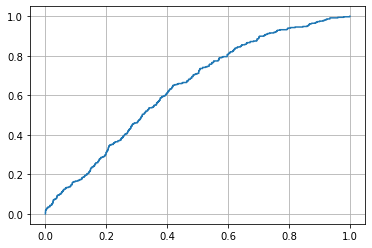

In [117]:
plt.plot( fpr, tpr )
plt.grid()